# Demo of _narrative graphs_


In [1]:
!rm output/demo_db.sqlite

rm: output/demo_db.sqlite: No such file or directory


In [2]:
from pandas import DataFrame
from sklearn.datasets import fetch_20newsgroups

n_docs = 500

data_bunch = fetch_20newsgroups()
docs = data_bunch.data[:n_docs]
categories = [data_bunch.target_names[target] for target in data_bunch.target][:n_docs]

In [3]:
from narrativegraph.narrativegraph import NarrativeGraph  # FIXME: this import statement is horrible

model = NarrativeGraph(sqlite_db_path="output/demo_db.sqlite")
model.fit(docs, categories=categories)

INFO:narrativegraph:Adding 500 documents to database
INFO:narrativegraph:Extracting triplets
Extracting triplets: 100%|██████████| 500/500 [00:15<00:00, 32.72it/s] 
INFO:narrativegraph:Mapping entities and relations
INFO:narrativegraph:Mapping triplets
Updating relation info: 100%|██████████| 1087/1087 [00:00<00:00, 3818.89it/s]


INFO:narrativegraph:Showing graph


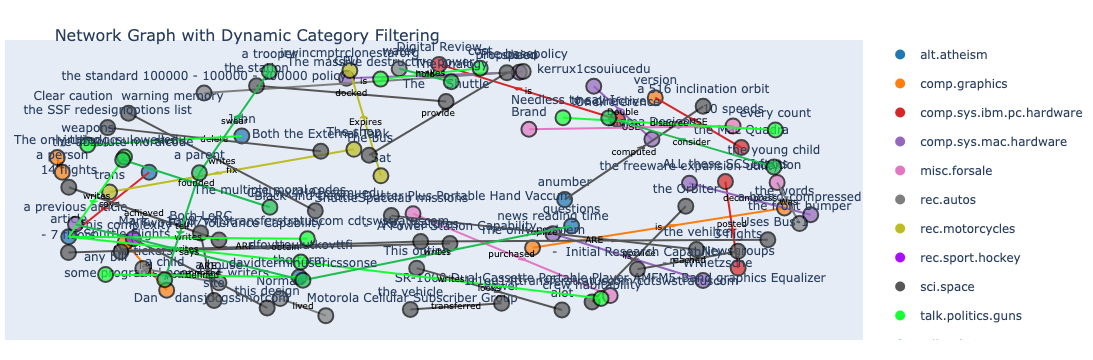

In [4]:
model.show_graph(max_edges=50)

In [5]:
model.serve_visualizer(block=False)

INFO:narrativegraph:Serving visualizer on port 8001
INFO:narrativegraph:Server started in background on port 8001
INFO:     Started server process [63702]
INFO:     Waiting for application startup.
INFO:root:Database service provided to state before startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8001 (Press CTRL+C to quit)


INFO:     127.0.0.1:49728 - "GET /vis HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:49728 - "GET /vis/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:49728 - "GET /vis/static/js/main.624748b9.js HTTP/1.1" 200 OK
INFO:     127.0.0.1:49728 - "GET /graph/bounds HTTP/1.1" 200 OK
INFO:     127.0.0.1:49728 - "POST /graph HTTP/1.1" 307 Temporary Redirect
INFO:     127.0.0.1:49728 - "POST /graph/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:49802 - "GET /entities/48 HTTP/1.1" 200 OK
INFO:     127.0.0.1:49802 - "GET /entities/48/docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:49843 - "GET /entities/65 HTTP/1.1" 200 OK
INFO:     127.0.0.1:49843 - "GET /entities/655 HTTP/1.1" 200 OK
INFO:     127.0.0.1:49843 - "GET /entities/246 HTTP/1.1" 200 OK
INFO:     127.0.0.1:49843 - "GET /entities/1096 HTTP/1.1" 200 OK
INFO:     127.0.0.1:49843 - "GET /entities/71 HTTP/1.1" 200 OK
INFO:     127.0.0.1:49843 - "GET /entities/979 HTTP/1.1" 200 OK
INFO:     127.0.0.1:49843 - "GET /entities/979/docs HTTP/1.1" 200 OK
INFO:     1

In [6]:
from IPython.display import IFrame

url = 'http://localhost:8001/vis'
IFrame(url, width='100%', height=800)


In [7]:
await model.stop_visualizer()

INFO:narrativegraph:Background server stopped
